In [313]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import scipy.stats as stats
import statsmodels.tsa.stattools as sts
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from scipy.stats.distributions import chi2
from itertools import product
from typing import Union
from tqdm import tqdm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.stats.diagnostic import acorr_ljungbox
import os

from pandas.tseries.offsets import CustomBusinessDay

pd.set_option('display.max_columns', None)

In [314]:
os.getcwd()

'C:\\Users\\javie\\cursos\\diplomado\\modulo 6 - trabajo final\\anexo principal'

In [315]:
df = pd.read_excel("./lecturas.xlsx")

In [316]:
df.head()

,SOCIO,N_SOCIO,DIRECCION,NRO,FONO,RUC_CLI,FECHA,COD,CONCEPTO,IMPORTE,CATEGORIA,MES_COBRO,LEC_ANTES,LECT_HOY,CREDITO,CONSUMO,ATRASO,TOTAL,LITE,EMISION,MEDIDOR,VENCE,ALUMBRADO,BASURA,CERTIF,TITULO,INGRESO,BANDERA,VALOR,CARNET,FLEC,MINIMO,CORTE,MULTAS,RECONEX,FALTAS,BANDI,OTROS,BENEMERITO,ZONA,DESCBENEME,ALCANTARI,ORDENES,HEXA,NUMFAC,FACTURA,COPIA,REUNION,TRABAJOS,PASIBLE,LEIANTES,GESTION,CPU
0,260.0,260,Thika Khatu,NaN,NaN,NaN,NaN,NaN,NaN,18.0,Domestica,Junio,40.0,52.0,0.0,12.0,6313.0,23.5,NaN,NaN,NaN,20070731.0,0.0,0.0,NaN,NaN,20061221.0,1.0,0.0,NaN,20070702.0,NaN,5.0,NaN,NaN,0.5,1.0,0.0,0.0,T,20.0,0.0,1.0,A,NaN,NaN,1.0,NaN,NaN,20070930.0,20070602.0,2007.0,NaN
1,260.0,260,Thika Khatu,NaN,NaN,NaN,NaN,NaN,NaN,18.0,Domestica,Julio,52.0,52.0,0.0,0.0,6282.0,23.5,NaN,NaN,NaN,20070831.0,0.0,0.0,NaN,NaN,20061221.0,0.0,0.0,NaN,20070801.0,NaN,5.0,NaN,NaN,0.5,1.0,0.0,0.0,T,20.0,0.0,1.0,A,NaN,NaN,1.0,NaN,NaN,20071030.0,20070702.0,2007.0,NaN
2,260.0,260,Thika Khatu,NaN,NaN,NaN,NaN,NaN,NaN,18.0,Domestica,Agosto,52.0,52.0,0.0,0.0,6251.0,23.5,NaN,NaN,NaN,20071001.0,0.0,0.0,NaN,NaN,20061221.0,0.0,0.0,NaN,20070901.0,NaN,5.0,NaN,NaN,0.5,1.0,0.0,0.0,T,20.0,0.0,1.0,A,NaN,NaN,1.0,NaN,NaN,20071130.0,20070802.0,2007.0,NaN
3,260.0,260,Thika Khatu,NaN,NaN,NaN,NaN,NaN,NaN,18.0,Domestica,Septiembre,52.0,52.0,0.0,0.0,6221.0,23.5,NaN,NaN,NaN,20071031.0,0.0,0.0,NaN,NaN,20061221.0,0.0,0.0,NaN,20071001.0,NaN,5.0,NaN,NaN,0.5,1.0,0.0,0.0,T,20.0,0.0,1.0,A,NaN,NaN,1.0,NaN,NaN,20071230.0,20070901.0,2007.0,NaN
4,260.0,260,Thika Khatu,NaN,NaN,NaN,NaN,NaN,NaN,18.0,Domestica,Octubre,52.0,52.0,0.0,0.0,6191.0,23.5,NaN,NaN,NaN,20071130.0,0.0,0.0,NaN,NaN,20061221.0,0.0,0.0,NaN,20071102.0,NaN,5.0,NaN,NaN,0.5,1.0,0.0,0.0,T,20.0,0.0,1.0,A,NaN,NaN,1.0,NaN,NaN,20080131.0,20071003.0,2007.0,NaN


In [317]:
df.shape

(19889, 53)

# Tratamiento de nulos

In [319]:
df.isnull().sum()

SOCIO            16
N_SOCIO          26
DIRECCION       298
NRO           19670
FONO          12054
RUC_CLI       18966
FECHA          1018
COD           19864
CONCEPTO       1010
IMPORTE         102
CATEGORIA       100
MES_COBRO       103
LEC_ANTES       108
LECT_HOY        110
CREDITO         145
CONSUMO         104
ATRASO          104
TOTAL           101
LITE           1117
EMISION       19883
MEDIDOR       10319
VENCE           128
ALUMBRADO       146
BASURA          144
CERTIF        19472
TITULO        19872
INGRESO         132
BANDERA         136
VALOR           138
CARNET         4637
FLEC            115
MINIMO        19885
CORTE         10688
MULTAS        19875
RECONEX       19850
FALTAS          117
BANDI           753
OTROS           147
BENEMERITO      135
ZONA            178
DESCBENEME      142
ALCANTARI       135
ORDENES         153
HEXA          19700
NUMFAC         1122
FACTURA        1017
COPIA           113
REUNION       18086
TRABAJOS      18844
PASIBLE         139


In [320]:
print('valores nulos: ', df.isnull().sum().sum())

valores nulos:  301337


In [321]:
df.columns

Index(['SOCIO', 'N_SOCIO', 'DIRECCION', 'NRO', 'FONO', 'RUC_CLI', 'FECHA',
       'COD', 'CONCEPTO', 'IMPORTE', 'CATEGORIA', 'MES_COBRO', 'LEC_ANTES',
       'LECT_HOY', 'CREDITO', 'CONSUMO', 'ATRASO', 'TOTAL', 'LITE', 'EMISION',
       'MEDIDOR', 'VENCE', 'ALUMBRADO', 'BASURA', 'CERTIF', 'TITULO',
       'INGRESO', 'BANDERA', 'VALOR', 'CARNET', 'FLEC', 'MINIMO', 'CORTE',
       'MULTAS', 'RECONEX', 'FALTAS', 'BANDI', 'OTROS', 'BENEMERITO', 'ZONA',
       'DESCBENEME', 'ALCANTARI', 'ORDENES', 'HEXA', 'NUMFAC', 'FACTURA',
       'COPIA', 'REUNION', 'TRABAJOS', 'PASIBLE', 'LEIANTES', 'GESTION',
       'CPU'],
      dtype='object')

In [322]:
df = df.drop(columns=['SOCIO', 'N_SOCIO', 'DIRECCION', 'NRO', 'FONO',
       'RUC_CLI', 'COD', 'CONCEPTO', 'CREDITO', 'LITE', 'EMISION', 'MEDIDOR', 
        'ALUMBRADO', 'BASURA', 'CERTIF', 'TITULO', 'BANDERA', 'CARNET', 'MINIMO', 'CORTE', 'MULTAS', 
        'RECONEX', 'BANDI', 'OTROS', 'ALCANTARI', 'ORDENES', 'HEXA',
       'NUMFAC', 'FACTURA', 'COPIA', 'REUNION', 'TRABAJOS', 'CPU'])

In [323]:
df.tail(30)

,FECHA,IMPORTE,CATEGORIA,MES_COBRO,LEC_ANTES,LECT_HOY,CONSUMO,ATRASO,TOTAL,VENCE,INGRESO,VALOR,FLEC,FALTAS,BENEMERITO,ZONA,DESCBENEME,PASIBLE,LEIANTES,GESTION
19859,NaN,18.0,Domestica,Diciembre,423.0,439.0,16.0,0.0,19.30,20250210.0,20150701.0,0.0,20241231.0,1.3,0.0,U,30.0,20250301.0,20241201.0,2024.0
19860,NaN,47.0,Domestica,Diciembre,1641.0,1665.0,24.0,0.0,48.10,20250210.0,20081117.0,0.0,20241231.0,1.3,0.0,U,30.0,20250301.0,20241201.0,2024.0
19861,NaN,39.0,Domestica,Diciembre,662.0,682.0,20.0,0.0,40.30,20250210.0,20061206.0,0.0,20241231.0,1.3,0.0,U,30.0,20250301.0,20241201.0,2024.0
19862,NaN,18.0,Domestica,Diciembre,142.0,142.0,0.0,0.0,19.30,20250210.0,20091106.0,0.0,20241231.0,1.3,0.0,U,30.0,20250301.0,20241201.0,2024.0
19863,NaN,18.0,Domestica,Diciembre,661.0,677.0,16.0,0.0,19.30,20250210.0,20100712.0,0.0,20241231.0,1.3,0.0,U,30.0,20250301.0,20241201.0,2024.0
19864,NaN,18.0,Domestica,Diciembre,504.0,515.0,11.0,0.0,19.30,20250210.0,20101013.0,0.0,20241231.0,1.3,0.0,U,30.0,20250301.0,20241201.0,2024.0
19865,NaN,205.0,Domestica,Diciembre,912.0,976.0,64.0,0.0,206.10,20250210.0,20101203.0,0.0,20241231.0,1.3,0.0,U,30.0,20250301.0,20241201.0,2024.0
19866,NaN,18.0,Domestica,Diciembre,480.0,489.0,9.0,0.0,19.30,20250210.0,20101203.0,0.0,20241231.0,1.3,0.0,U,30.0,20250301.0,20241201.0,2024.0
19867,NaN,144.0,Comercial,Diciembre,1215.0,1256.0,41.0,0.0,144.80,20250210.0,20101203.0,0.0,20241231.0,1.3,0.0,U,30.0,20250301.0,20241201.0,2024.0
19868,NaN,18.0,Domestica,Diciembre,318.0,323.0,5.0,0.0,49.30,20250210.0,20110405.0,0.0,20241231.0,1.3,1.0,U,30.0,20250301.0,20241201.0,2024.0


In [324]:
df.shape

(19889, 20)

In [325]:
df.isnull().sum()

FECHA         1018
IMPORTE        102
CATEGORIA      100
MES_COBRO      103
LEC_ANTES      108
LECT_HOY       110
CONSUMO        104
ATRASO         104
TOTAL          101
VENCE          128
INGRESO        132
VALOR          138
FLEC           115
FALTAS         117
BENEMERITO     135
ZONA           178
DESCBENEME     142
PASIBLE        139
LEIANTES       115
GESTION        116
dtype: int64

In [326]:
df.columns

Index(['FECHA', 'IMPORTE', 'CATEGORIA', 'MES_COBRO', 'LEC_ANTES', 'LECT_HOY',
       'CONSUMO', 'ATRASO', 'TOTAL', 'VENCE', 'INGRESO', 'VALOR', 'FLEC',
       'FALTAS', 'BENEMERITO', 'ZONA', 'DESCBENEME', 'PASIBLE', 'LEIANTES',
       'GESTION'],
      dtype='object')

In [327]:
df = df.dropna(subset=['FECHA', 'IMPORTE', 'CATEGORIA', 'MES_COBRO', 'LEC_ANTES',
       'LECT_HOY', 'CONSUMO', 'ATRASO', 'TOTAL', 'VENCE', 'INGRESO', 'VALOR',
       'FLEC', 'FALTAS', 'BENEMERITO', 'ZONA', 'DESCBENEME', 'PASIBLE',
       'LEIANTES', 'GESTION'])
df.isnull().sum()

FECHA         0
IMPORTE       0
CATEGORIA     0
MES_COBRO     0
LEC_ANTES     0
LECT_HOY      0
CONSUMO       0
ATRASO        0
TOTAL         0
VENCE         0
INGRESO       0
VALOR         0
FLEC          0
FALTAS        0
BENEMERITO    0
ZONA          0
DESCBENEME    0
PASIBLE       0
LEIANTES      0
GESTION       0
dtype: int64

In [328]:
df.shape

(18803, 20)

# Tratamiento de fechas

In [330]:
df.dtypes

FECHA          object
IMPORTE       float64
CATEGORIA      object
MES_COBRO      object
LEC_ANTES     float64
LECT_HOY      float64
CONSUMO       float64
ATRASO        float64
TOTAL         float64
VENCE         float64
INGRESO       float64
VALOR         float64
FLEC          float64
FALTAS        float64
BENEMERITO    float64
ZONA           object
DESCBENEME    float64
PASIBLE       float64
LEIANTES      float64
GESTION       float64
dtype: object

In [331]:
fechas = df['FECHA'].value_counts().to_frame()
inconsistencias = fechas[fechas.index.str.len() < 8]
inconsistencias

,count
FECHA,
0,1
202210,1
2022090,1
20221,1
202,1


In [332]:
filtered_df = df[(df['FECHA'].str.len() == 8) | (df['FECHA'].isna())].copy()
filtered_df.shape

(18798, 20)

In [333]:
filtered_df['FECHA'] = filtered_df['FECHA'].astype(str)
filtered_df['AÑO'] = filtered_df['FECHA'].str[:4]
filtered_df['MES'] = filtered_df['FECHA'].str[4:6]
filtered_df['DIA'] = filtered_df['FECHA'].str[6:8]
filtered_df['AÑO'] = filtered_df['AÑO'].astype('Int64')
filtered_df['MES'] = filtered_df['MES'].astype('Int64')
filtered_df['DIA'] = filtered_df['DIA'].astype('Int64')

In [334]:
anios_erroneas = filtered_df[(filtered_df['AÑO'] > 2026) | (filtered_df['AÑO'] < 1960)]
anios_erroneas

,FECHA,IMPORTE,CATEGORIA,MES_COBRO,LEC_ANTES,LECT_HOY,CONSUMO,ATRASO,TOTAL,VENCE,INGRESO,VALOR,FLEC,FALTAS,BENEMERITO,ZONA,DESCBENEME,PASIBLE,LEIANTES,GESTION,AÑO,MES,DIA
8902,60221130,18.0,Dolestica $,Octubru,531.0,556.0,25.0,0.0,49.0,202212.0,20.0,0.0,202.0,1.0,0.0,H,20.0,0.0,0.0,0.0,6022,11,30


In [335]:
filtered_df = filtered_df[(filtered_df['AÑO'] < 2026) & (filtered_df['AÑO'] > 1980)].copy()
filtered_df.shape

(18797, 23)

In [336]:
meses_erroneos = filtered_df[(filtered_df['MES'] > 12) | (filtered_df['MES'] < 1)]
meses_erroneos

,FECHA,IMPORTE,CATEGORIA,MES_COBRO,LEC_ANTES,LECT_HOY,CONSUMO,ATRASO,TOTAL,VENCE,INGRESO,VALOR,FLEC,FALTAS,BENEMERITO,ZONA,DESCBENEME,PASIBLE,LEIANTES,GESTION,AÑO,MES,DIA
8909,20224221,18.0,Domest9ca,Oc5ubre u,367.0,0.0,-367.0,731917.0,19.3,20.0,201608.0,0.0,20221030.0,1.3,0.0,H,0.0,2022.0,20225930.0,2022.0,2022,42,21


In [337]:
filtered_df = filtered_df[(filtered_df['MES'] <= 12) & (filtered_df['MES'] >= 1)].copy()
filtered_df.shape

(18796, 23)

In [338]:
dias_erroneos = filtered_df[(filtered_df['DIA'] > 31) | (filtered_df['DIA'] < 1)]
dias_erroneos

,FECHA,IMPORTE,CATEGORIA,MES_COBRO,LEC_ANTES,LECT_HOY,CONSUMO,ATRASO,TOTAL,VENCE,INGRESO,VALOR,FLEC,FALTAS,BENEMERITO,ZONA,DESCBENEME,PASIBLE,LEIANTES,GESTION,AÑO,MES,DIA


In [339]:
filtered_df = filtered_df.drop(columns=['AÑO', 'MES', 'DIA'])
filtered_df["FECHA"] = pd.to_datetime(filtered_df["FECHA"], format='%Y%m%d')
filtered_df

,FECHA,IMPORTE,CATEGORIA,MES_COBRO,LEC_ANTES,LECT_HOY,CONSUMO,ATRASO,TOTAL,VENCE,INGRESO,VALOR,FLEC,FALTAS,BENEMERITO,ZONA,DESCBENEME,PASIBLE,LEIANTES,GESTION
343,2022-12-21,39.0,Domestica,Marzo,5311.0,5331.0,20.0,2012.0,75.30,20190510.0,19991128.0,0.0,20190331.0,1.3,0.0,J,20.0,20190410.0,20190228.0,2019.0
344,2022-12-21,43.0,Domestica,Abril,5331.0,5353.0,22.0,1981.0,49.20,20190610.0,19991128.0,0.0,20190430.0,1.3,0.0,J,20.0,20190510.0,20190331.0,2019.0
345,2023-09-29,41.0,Domestica,Mayo,5353.0,5374.0,21.0,1951.0,77.25,20190710.0,19991128.0,0.0,20190531.0,1.3,0.0,J,20.0,20190610.0,20190430.0,2019.0
346,2021-04-26,192.0,Domestica,Marzo,3484.0,3544.0,60.0,2012.0,198.30,20190510.0,19991128.0,0.0,20190331.0,1.3,0.0,I,20.0,20190410.0,20190228.0,2019.0
347,2021-07-28,195.0,Domestica,Abril,3544.0,3605.0,61.0,1981.0,201.50,20190610.0,19991128.0,0.0,20190430.0,1.3,0.0,I,20.0,20190510.0,20190331.0,2019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19849,2025-01-11,18.0,Domestica,Diciembre,139.0,143.0,4.0,0.0,19.30,20250210.0,20170701.0,0.0,20241231.0,1.3,0.0,U,30.0,20250301.0,20241201.0,2024.0
19879,2025-01-10,18.0,Domestica,Diciembre,423.0,432.0,9.0,0.0,19.30,20250210.0,19991128.0,0.0,20241231.0,1.3,0.0,X,30.0,20250301.0,20241201.0,2024.0
19885,2025-01-10,18.0,Domestica,Diciembre,837.0,848.0,11.0,0.0,19.30,20250210.0,20050825.0,0.0,20241231.0,1.3,0.0,X,30.0,20250301.0,20241201.0,2024.0
19886,2025-01-10,18.0,Domestica,Diciembre,505.0,509.0,4.0,0.0,19.30,20250210.0,20140123.0,450.0,20241231.0,1.3,0.0,H,30.0,20250301.0,20241201.0,2024.0


# Tratamiento de valores atipicos

In [341]:
filtered_df[['TOTAL']].describe()

,TOTAL
count,18796.000000
mean,68.395259
std,192.875959
min,19.300000
25%,19.300000
50%,19.300000
75%,50.050000
max,4366.300000


In [342]:
q1 = filtered_df['TOTAL'].quantile(q=0.25)
q3 = filtered_df['TOTAL'].quantile(q=0.75)
iqr = q3 - q1
print('cuartil 1: ', q1)
print('cuartil 3: ', q3)
print('rango intercuartilico: ', iqr)

cuartil 1:  19.3
cuartil 3:  50.05
rango intercuartilico:  30.749999999999996


In [343]:
print('limite inferior: ', q1 - 1.5 * iqr)
print('limite superior: ', q3 + 1.5 * iqr)

limite inferior:  -26.824999999999992
limite superior:  96.17499999999998


In [344]:
fuera = filtered_df[(filtered_df['TOTAL'] < (q1 - 1.5 * iqr)) | (filtered_df['TOTAL'] > (q3 + 1.5 * iqr))]
fuera

,FECHA,IMPORTE,CATEGORIA,MES_COBRO,LEC_ANTES,LECT_HOY,CONSUMO,ATRASO,TOTAL,VENCE,INGRESO,VALOR,FLEC,FALTAS,BENEMERITO,ZONA,DESCBENEME,PASIBLE,LEIANTES,GESTION
346,2021-04-26,192.0,Domestica,Marzo,3484.0,3544.0,60.0,2012.0,198.30,20190510.0,19991128.0,0.0,20190331.0,1.3,0.0,I,20.0,20190410.0,20190228.0,2019.0
347,2021-07-28,195.0,Domestica,Abril,3544.0,3605.0,61.0,1981.0,201.50,20190610.0,19991128.0,0.0,20190430.0,1.3,0.0,I,20.0,20190510.0,20190331.0,2019.0
348,2021-08-11,352.0,Domestica,Mayo,3605.0,3693.0,88.0,1951.0,458.30,20190710.0,19991128.0,0.0,20190531.0,1.3,0.0,I,20.0,20190610.0,20190430.0,2019.0
351,2021-08-23,221.0,Domestica,Junio,3693.0,3762.0,69.0,1920.0,257.10,20190810.0,19991128.0,0.0,20190630.0,1.3,0.0,I,20.0,20190710.0,20190531.0,2019.0
353,2022-05-25,198.0,Domestica,Julio,3762.0,3824.0,62.0,1889.0,204.70,20190910.0,19991128.0,0.0,20190731.0,1.3,0.0,I,20.0,20190810.0,20190630.0,2019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19452,2024-12-27,950.0,Especial,Octubre,2966.0,3098.0,132.0,0.0,956.70,20241210.0,19991128.0,0.0,20241031.0,1.3,0.0,T,30.0,20241230.0,20241001.0,2024.0
19453,2024-12-27,864.0,Especial,Noviembre,3098.0,3218.0,120.0,0.0,865.30,20250110.0,19991128.0,0.0,20241130.0,1.3,0.0,T,30.0,20250129.0,20241031.0,2024.0
19484,2024-12-19,177.0,Especial,Octubre,1453.0,1495.0,42.0,0.0,183.54,20241210.0,20120911.0,0.0,20241031.0,1.3,0.0,V,30.0,20241230.0,20241001.0,2024.0
19485,2024-12-19,114.0,Especial,Noviembre,1495.0,1522.0,27.0,0.0,115.24,20250110.0,20120911.0,0.0,20241130.0,1.3,0.0,V,30.0,20250129.0,20241031.0,2024.0


In [345]:
negativos = filtered_df[filtered_df['TOTAL']<0]
negativos

,FECHA,IMPORTE,CATEGORIA,MES_COBRO,LEC_ANTES,LECT_HOY,CONSUMO,ATRASO,TOTAL,VENCE,INGRESO,VALOR,FLEC,FALTAS,BENEMERITO,ZONA,DESCBENEME,PASIBLE,LEIANTES,GESTION


In [346]:
filtered_df = filtered_df[(filtered_df['TOTAL'] > 0) & (filtered_df['TOTAL'] < (q3 + 1.5 * iqr))]
filtered_df

,FECHA,IMPORTE,CATEGORIA,MES_COBRO,LEC_ANTES,LECT_HOY,CONSUMO,ATRASO,TOTAL,VENCE,INGRESO,VALOR,FLEC,FALTAS,BENEMERITO,ZONA,DESCBENEME,PASIBLE,LEIANTES,GESTION
343,2022-12-21,39.0,Domestica,Marzo,5311.0,5331.0,20.0,2012.0,75.30,20190510.0,19991128.0,0.0,20190331.0,1.3,0.0,J,20.0,20190410.0,20190228.0,2019.0
344,2022-12-21,43.0,Domestica,Abril,5331.0,5353.0,22.0,1981.0,49.20,20190610.0,19991128.0,0.0,20190430.0,1.3,0.0,J,20.0,20190510.0,20190331.0,2019.0
345,2023-09-29,41.0,Domestica,Mayo,5353.0,5374.0,21.0,1951.0,77.25,20190710.0,19991128.0,0.0,20190531.0,1.3,0.0,J,20.0,20190610.0,20190430.0,2019.0
349,2021-08-30,18.0,Domestica,Junio,54.0,64.0,10.0,1920.0,54.30,20190810.0,19991128.0,0.0,20190630.0,1.3,0.0,C,20.0,20190710.0,20190531.0,2019.0
350,2023-09-29,37.0,Domestica,Junio,5374.0,5393.0,19.0,1920.0,73.35,20190810.0,19991128.0,0.0,20190630.0,1.3,0.0,J,20.0,20190710.0,20190531.0,2019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19849,2025-01-11,18.0,Domestica,Diciembre,139.0,143.0,4.0,0.0,19.30,20250210.0,20170701.0,0.0,20241231.0,1.3,0.0,U,30.0,20250301.0,20241201.0,2024.0
19879,2025-01-10,18.0,Domestica,Diciembre,423.0,432.0,9.0,0.0,19.30,20250210.0,19991128.0,0.0,20241231.0,1.3,0.0,X,30.0,20250301.0,20241201.0,2024.0
19885,2025-01-10,18.0,Domestica,Diciembre,837.0,848.0,11.0,0.0,19.30,20250210.0,20050825.0,0.0,20241231.0,1.3,0.0,X,30.0,20250301.0,20241201.0,2024.0
19886,2025-01-10,18.0,Domestica,Diciembre,505.0,509.0,4.0,0.0,19.30,20250210.0,20140123.0,450.0,20241231.0,1.3,0.0,H,30.0,20250301.0,20241201.0,2024.0


# Agrupamiento por fechas

In [348]:
grouped_df = filtered_df.groupby(['FECHA']).agg({'TOTAL': 'sum'}).sort_values(['FECHA'], ascending=True)
grouped_df

,TOTAL
FECHA,
2021-04-01,89.18
2021-04-03,168.92
2021-04-05,452.21
2021-04-06,208.30
2021-04-07,482.62
...,...
2025-01-07,143.80
2025-01-08,222.13
2025-01-09,57.90


In [349]:
custom_freq = CustomBusinessDay(weekmask='Mon Tue Wed Thu Fri Sat')
grouped_df = grouped_df.asfreq(custom_freq)

In [350]:
grouped_df.isna().sum()

TOTAL    112
dtype: int64

In [351]:
grouped_df = grouped_df.fillna(1)
grouped_df

,TOTAL
FECHA,
2021-04-01,89.18
2021-04-02,1.00
2021-04-03,168.92
2021-04-05,452.21
2021-04-06,208.30
...,...
2025-01-07,143.80
2025-01-08,222.13
2025-01-09,57.90


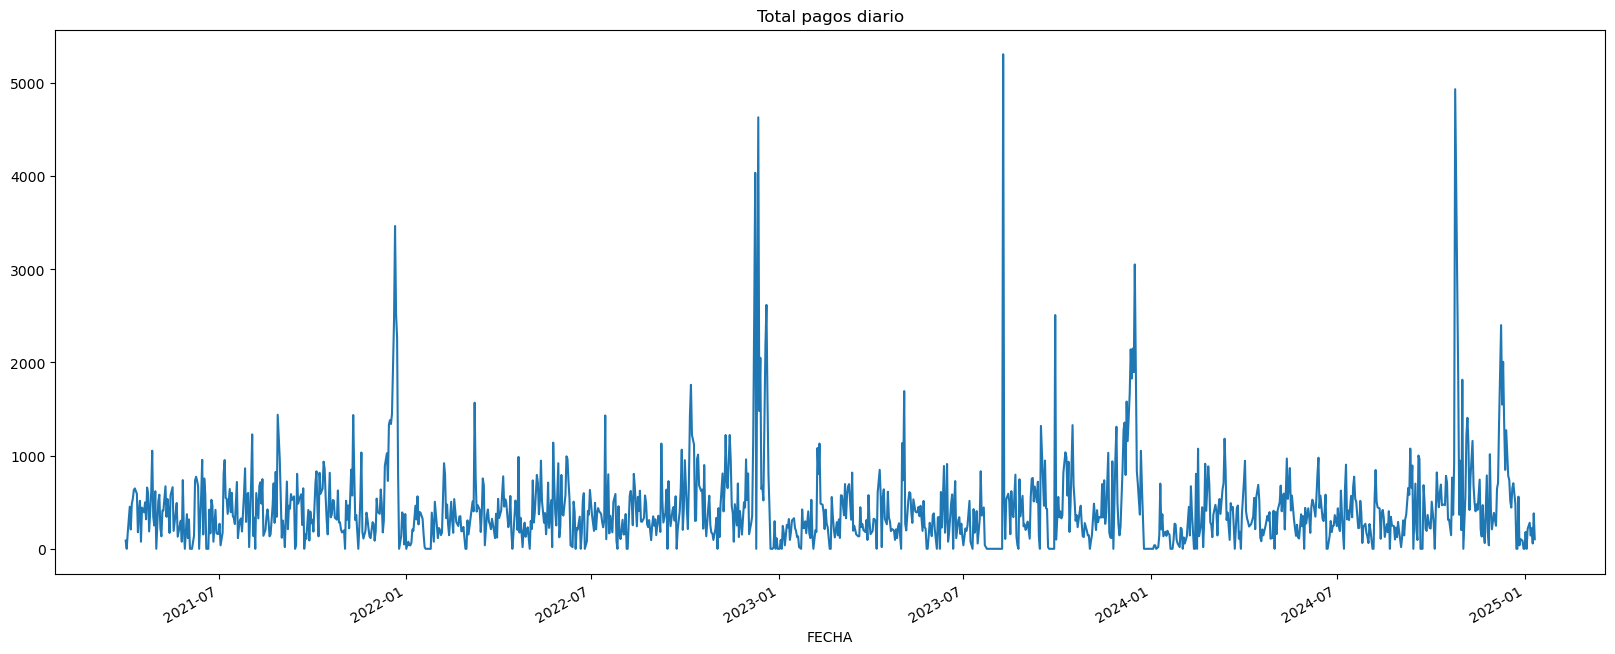

In [352]:
grouped_df["TOTAL"].plot(figsize=(20,8), title = "Total pagos diario")
plt.show()

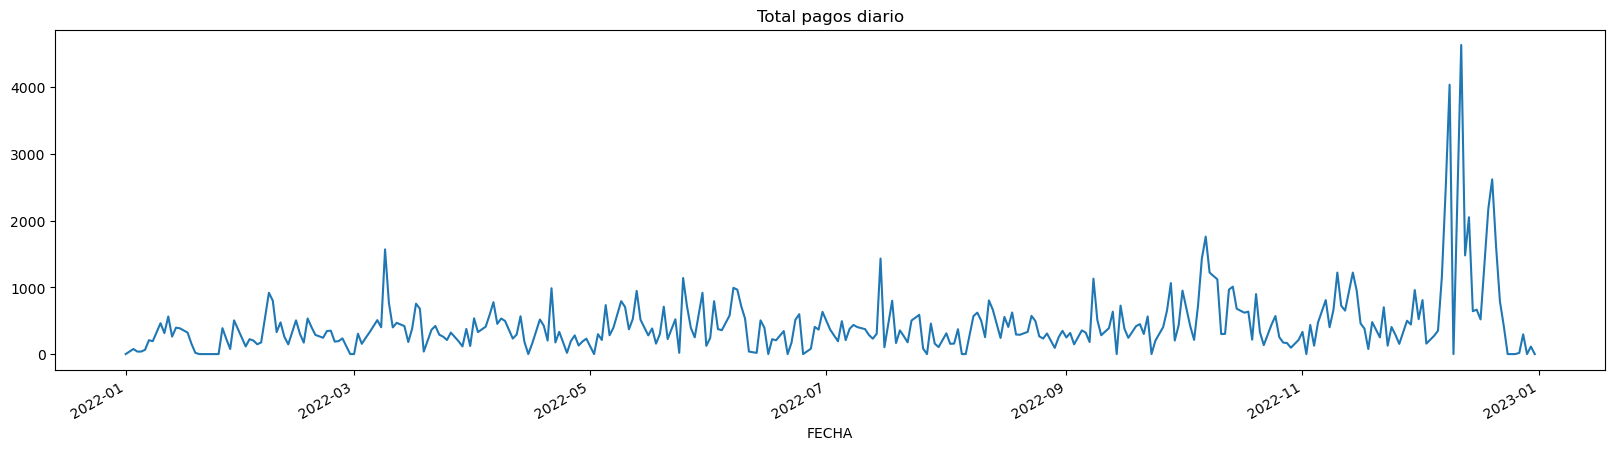

In [353]:
anio_22 = grouped_df.loc['2022-01-01':'2022-12-31']
anio_22["TOTAL"].plot(figsize=(20,5), title = "Total pagos diario")
plt.show()

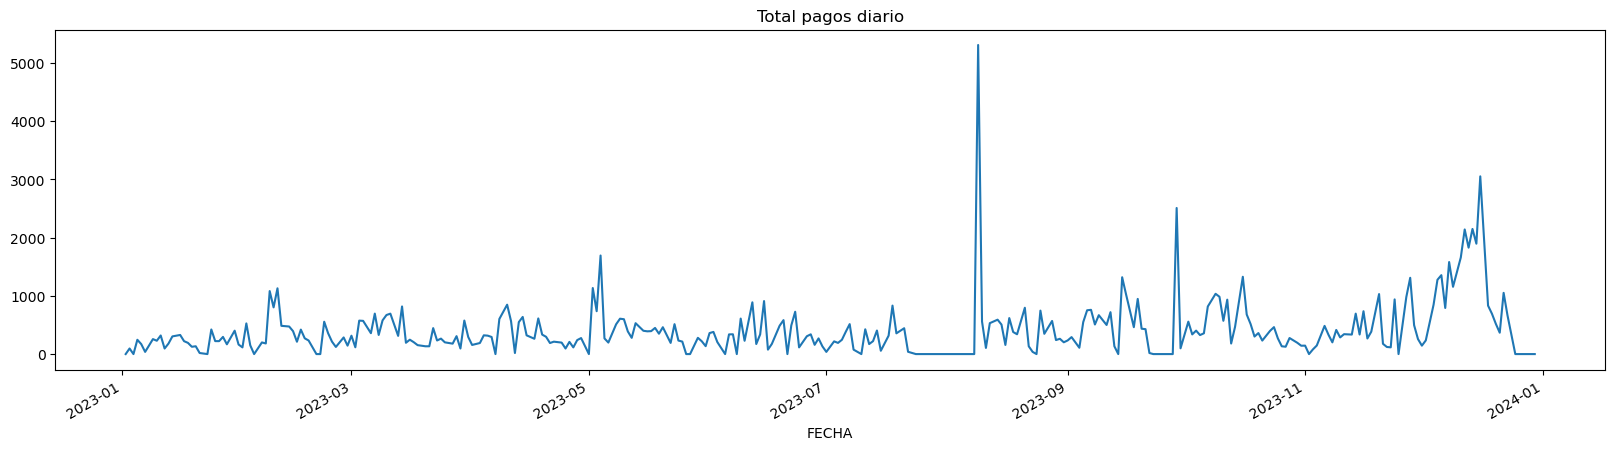

In [354]:
anio = grouped_df.loc['2023-01-01':'2023-12-31']
anio["TOTAL"].plot(figsize=(20,5), title = "Total pagos diario")
plt.show()

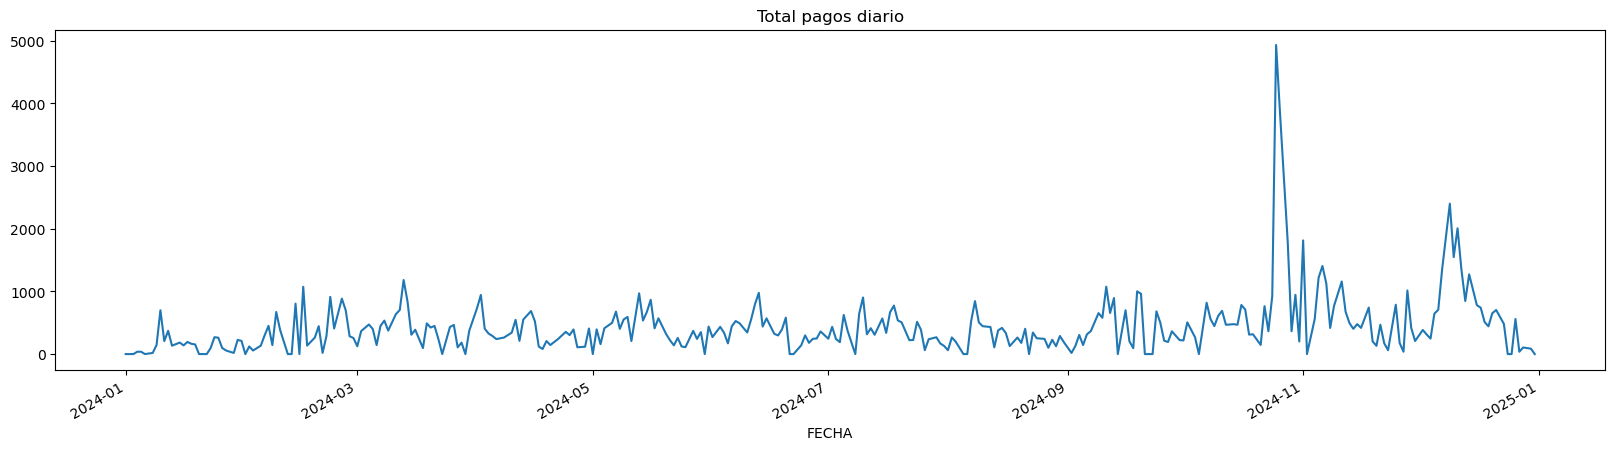

In [355]:
anio_24 = grouped_df.loc['2024-01-01':'2024-12-31']
anio_24["TOTAL"].plot(figsize=(20,5), title = "Total pagos diario")
plt.show()

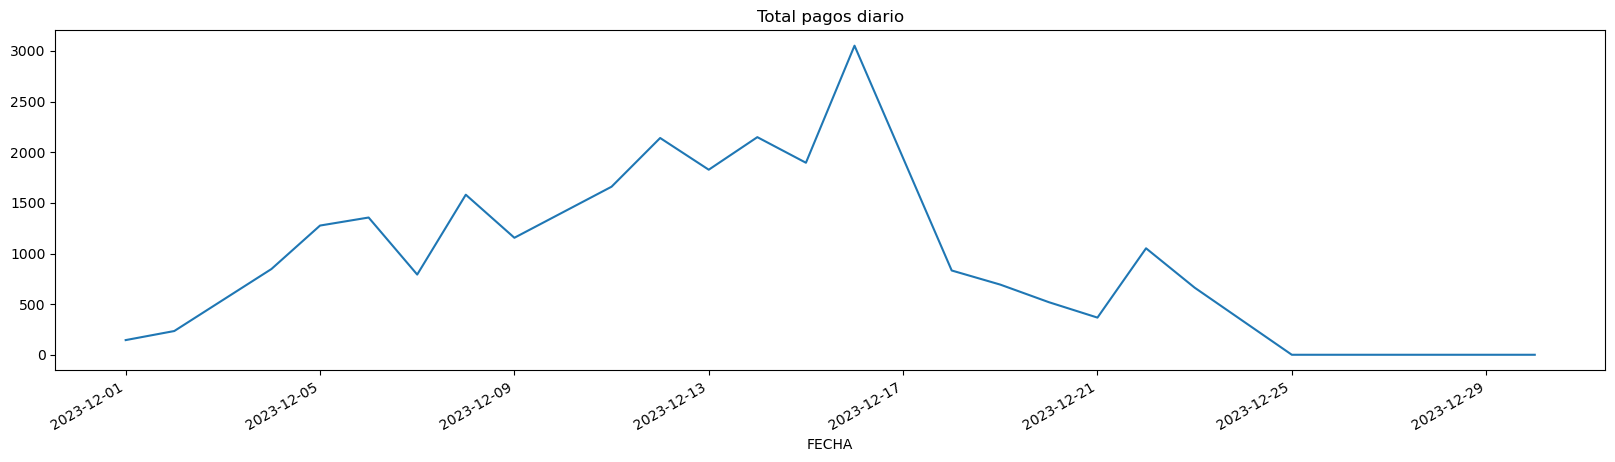

In [356]:
mes = grouped_df.loc['2023-12-01':'2023-12-31']
mes["TOTAL"].plot(figsize=(20,5), title = "Total pagos diario")
plt.show()

# Tratamiento de valores atipicos en la serie de tiempo

q1:  173.70000000000002
q3:  559.0
iqr:  385.29999999999995


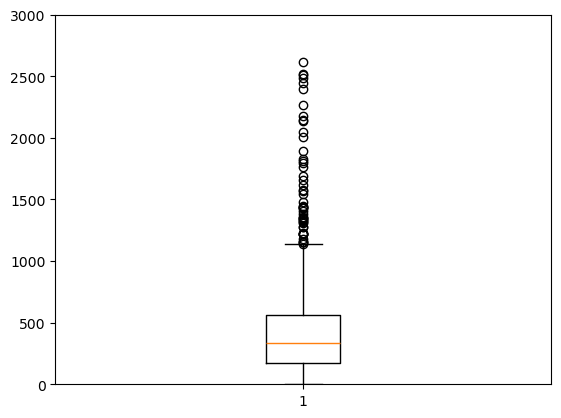

In [358]:
q1_serie = grouped_df['TOTAL'].quantile(q=0.25)
q3_serie = grouped_df['TOTAL'].quantile(q=0.75)
iqr_serie = q3_serie - q1_serie
print('q1: ', q1_serie)
print('q3: ', q3_serie)
print('iqr: ', iqr_serie)
plt.ylim(0, 3000)
plt.boxplot(grouped_df['TOTAL']);

In [359]:
lower_bound = q1_serie - 1.5 * iqr_serie
upper_bound = q3_serie + 1.5 * iqr_serie
print('limite inferior: ', lower_bound)
print('limite superior: ', upper_bound)

limite inferior:  -404.2499999999999
limite superior:  1136.9499999999998


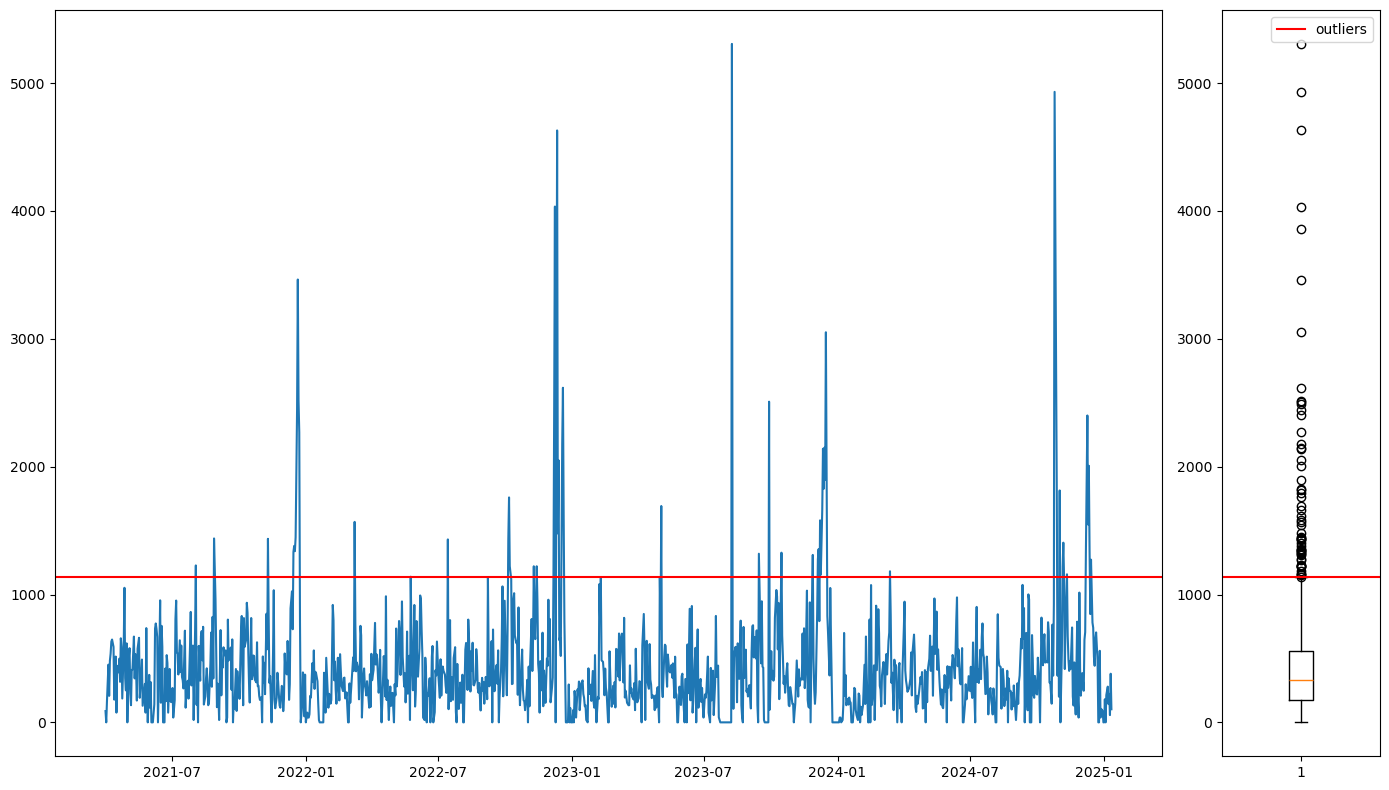

In [360]:
fig = plt.figure(figsize=(14, 8))
gs = gridspec.GridSpec(1, 2, width_ratios=[7, 1])
ax1 = plt.subplot(gs[0])
ax1.plot(grouped_df)
ax2 = plt.subplot(gs[1])
ax2.boxplot(grouped_df['TOTAL'])
ax1.axhline(upper_bound, color='red')
ax2.axhline(upper_bound, color='red',  label='outliers')
ax2.legend()
plt.tight_layout()
plt.show()

In [361]:
fuera = grouped_df[(grouped_df['TOTAL'] > upper_bound)]
fuera.count()

TOTAL    58
dtype: int64

### Winsorization

In [363]:
q99 = grouped_df['TOTAL'].quantile(q=0.99)
q99

2407.867200000004

In [364]:
fuera = grouped_df[(grouped_df['TOTAL'] > q99)]
fuera.count()

TOTAL    12
dtype: int64

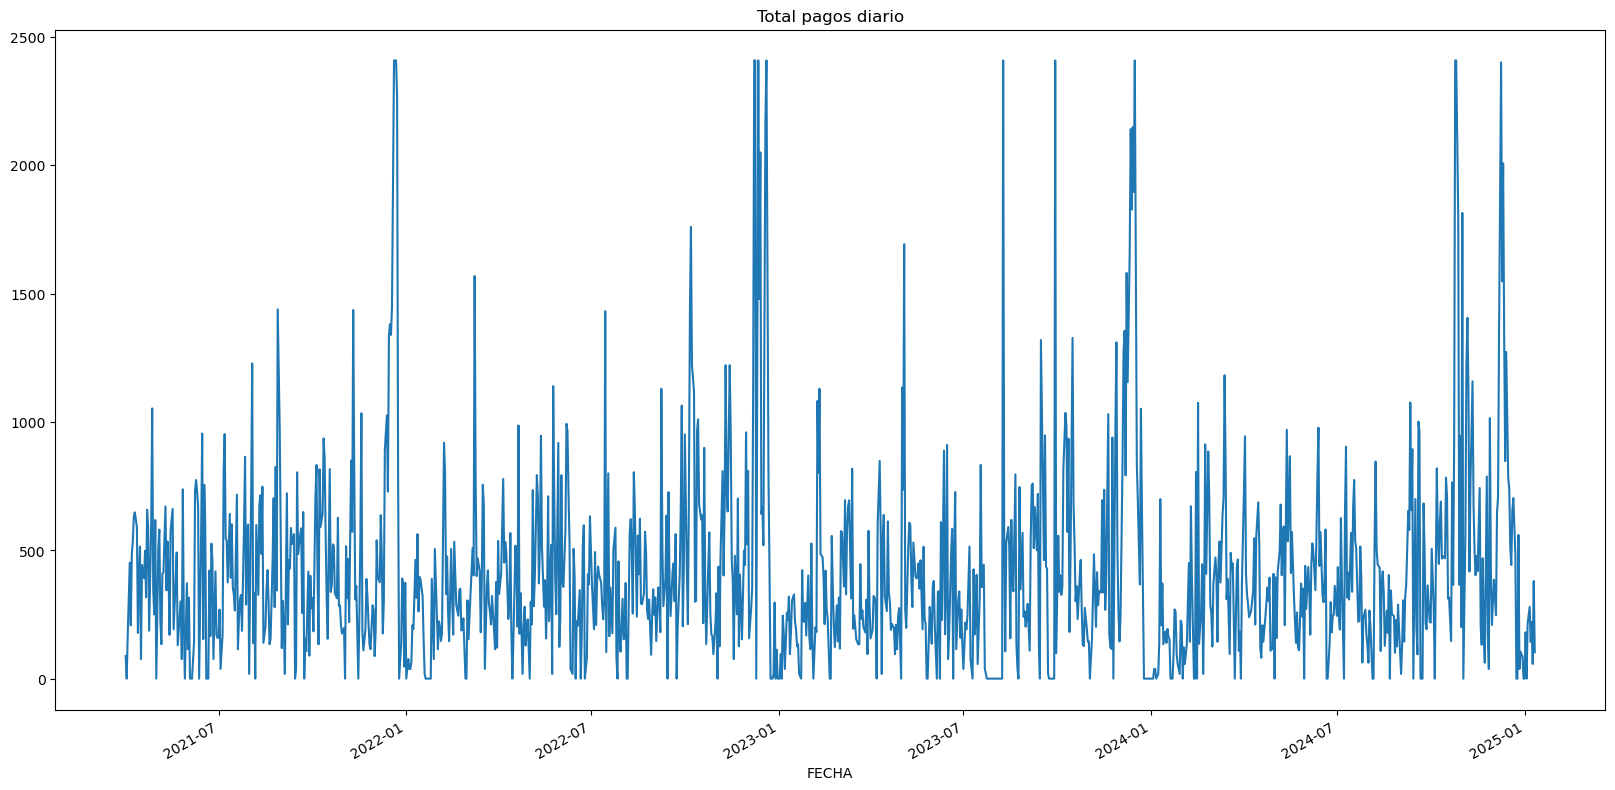

In [365]:
grouped_df.loc[grouped_df['TOTAL'] > q99, 'TOTAL'] = q99
grouped_df["TOTAL"].plot(figsize=(20,10), title = "Total pagos diario")
plt.show()

# Division de los datos

In [367]:
size = int(len(grouped_df)*0.8)
train_df = grouped_df.iloc[:size]
test_df = grouped_df.iloc[size:]

In [368]:
train_df

,TOTAL
FECHA,
2021-04-01,89.18
2021-04-02,1.00
2021-04-03,168.92
2021-04-05,452.21
2021-04-06,208.30
...,...
2024-04-05,290.30
2024-04-06,240.15
2024-04-08,264.75


In [369]:
test_df

,TOTAL
FECHA,
2024-04-11,547.20
2024-04-12,211.70
2024-04-13,552.25
2024-04-15,687.22
2024-04-16,524.55
...,...
2025-01-07,143.80
2025-01-08,222.13
2025-01-09,57.90


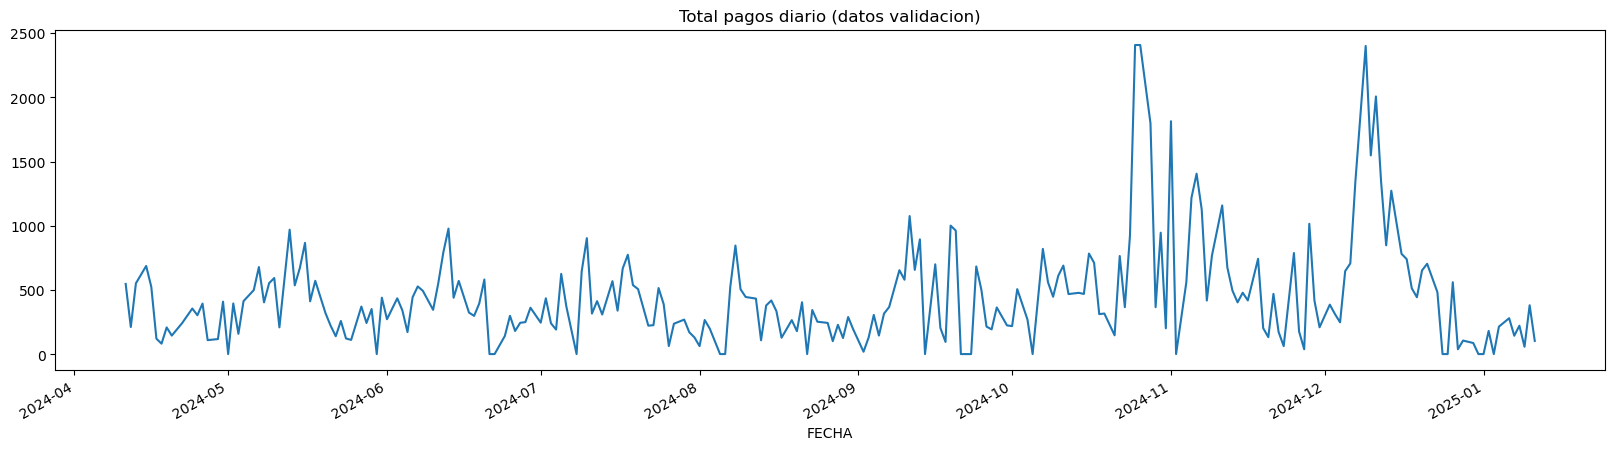

In [370]:
test_df["TOTAL"].plot(figsize=(20,5), title = "Total pagos diario (datos validacion)")
plt.show()

# Estacionariedad

In [372]:
sts.adfuller(grouped_df.TOTAL)

(-9.231847951276192,
 1.6701603812531289e-15,
 12,
 1172,
 {'1%': -3.4359418774356696,
  '5%': -2.864009233598981,
  '10%': -2.5680846730014326},
 16835.134157640336)

# Estacionalidad

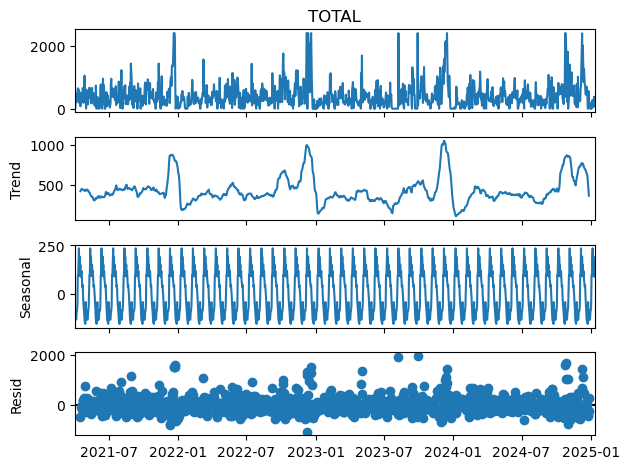

In [374]:
aditivo = seasonal_decompose(grouped_df.TOTAL, model="additive", period=26)
aditivo.plot()
plt.show()

# Autocorrelacion

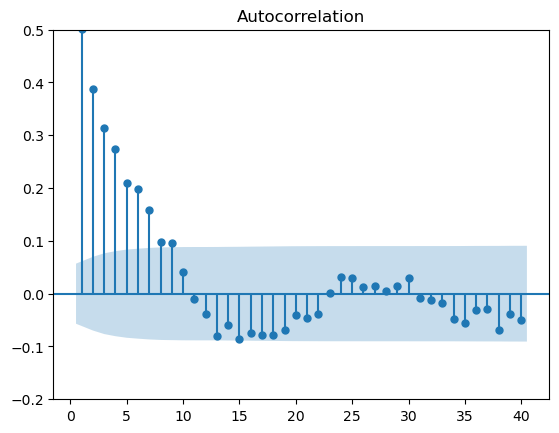

In [376]:
sgt.plot_acf(grouped_df.TOTAL, lags = 40, zero = False)
plt.ylim(-0.2, 0.5)
plt.show()

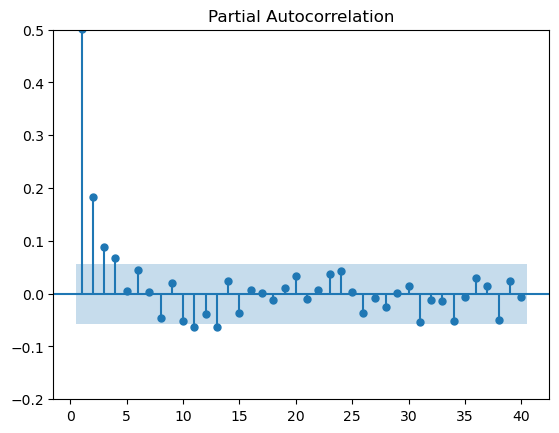

In [377]:
sgt.plot_pacf(grouped_df.TOTAL, lags = 40, zero = False, method = ('ols')) 
plt.ylim(-0.2, 0.5)
plt.show()

# LSTM

In [379]:
train_max = train_df.max()
train_min = train_df.min()
train_set_scaled = (train_df - train_min)/(train_max - train_min)
test_set_scaled = (test_df - train_min)/(train_max - train_min)
test_set_scaled

,TOTAL
FECHA,
2024-04-11,0.226934
2024-04-12,0.087541
2024-04-13,0.229032
2024-04-15,0.285109
2024-04-16,0.217523
...,...
2025-01-07,0.059330
2025-01-08,0.091875
2025-01-09,0.023641


In [380]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [381]:
time_steps = 1

X_train_1, y_train_1 = create_dataset(train_set_scaled, train_set_scaled.TOTAL , time_steps)
X_test_1,  y_test_1  = create_dataset(test_set_scaled,  test_set_scaled.TOTAL, time_steps)

In [382]:
from keras.models import Sequential 
from tensorflow.keras.layers import LSTM, Dropout, Dense, Input

def lstm_architecture(X_data,rate_dropout):
    model = Sequential()

    model.add(Input(shape=(X_data.shape[1], X_data.shape[2])))
    
    model.add(LSTM(units = 250, return_sequences = True))
    model.add(Dropout(rate=rate_dropout))

    model.add(LSTM(units = 250, return_sequences = True))
    model.add(Dropout(rate=rate_dropout))

    model.add(LSTM(units = 250, return_sequences = True))
    model.add(Dropout(rate=rate_dropout))

    model.add(LSTM(units = 250, return_sequences = False))
    model.add(Dropout(rate=rate_dropout))

    model.add(Dense(units = 1))

    model.summary()

    return model

In [383]:
import datetime
print('Iniciando a las: ', datetime.datetime.now())
print("...")

model_1 = lstm_architecture(X_data = X_train_1, rate_dropout = 0.2)
model_1.compile(optimizer = 'adam', loss = 'mean_squared_error')

Iniciando a las:  2025-06-12 13:32:28.587352
...


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                  │ (None, 1, 250)         │       252,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 1, 250)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_13 (LSTM)                  │ (None, 1, 250)         │       501,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 1, 250)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_14 (LSTM)                  │ (None, 1, 250)         │       501,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 1, 250)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_15 (LSTM)                  │ (None, 250)            │       501,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 250)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           251 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,755,251 (6.70 MB)

 Trainable params: 1,755,251 (6.70 MB)

 Non-trainable params: 0 (0.00 B)

In [384]:
history_1 = model_1.fit(X_train_1,
                    y_train_1,
                    epochs=100,
                    batch_size=32,
                    shuffle=False)

print("...")
print('Terminando a las: ', datetime.datetime.now())

Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.0370
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0216
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0193
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0171
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0173
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0175
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0174
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0173
Epoch 9/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0171
Epoch 10/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0170
Epoch 11/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0172
Epoch 12/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0171
Epoch 13/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0174
Epoch 14/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0173
Epoch 15/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0172


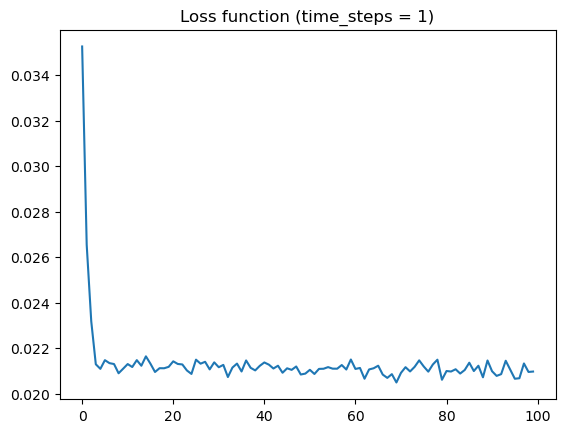

In [385]:
plt.plot(history_1.history['loss'], label='train')
plt.title('Loss function (time_steps = 1)')
plt.show()

In [386]:
y_pred_1 = model_1.predict(X_test_1)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step


In [387]:
y_test_1 = y_test_1 * (train_max.iloc[0] - train_min.iloc[0]) + train_min.iloc[0]
y_pred_1 = y_pred_1 * (train_max.iloc[0] - train_min.iloc[0]) + train_min.iloc[0]
y_train_1 = y_train_1 * (train_max.iloc[0] - train_min.iloc[0]) + train_min.iloc[0]

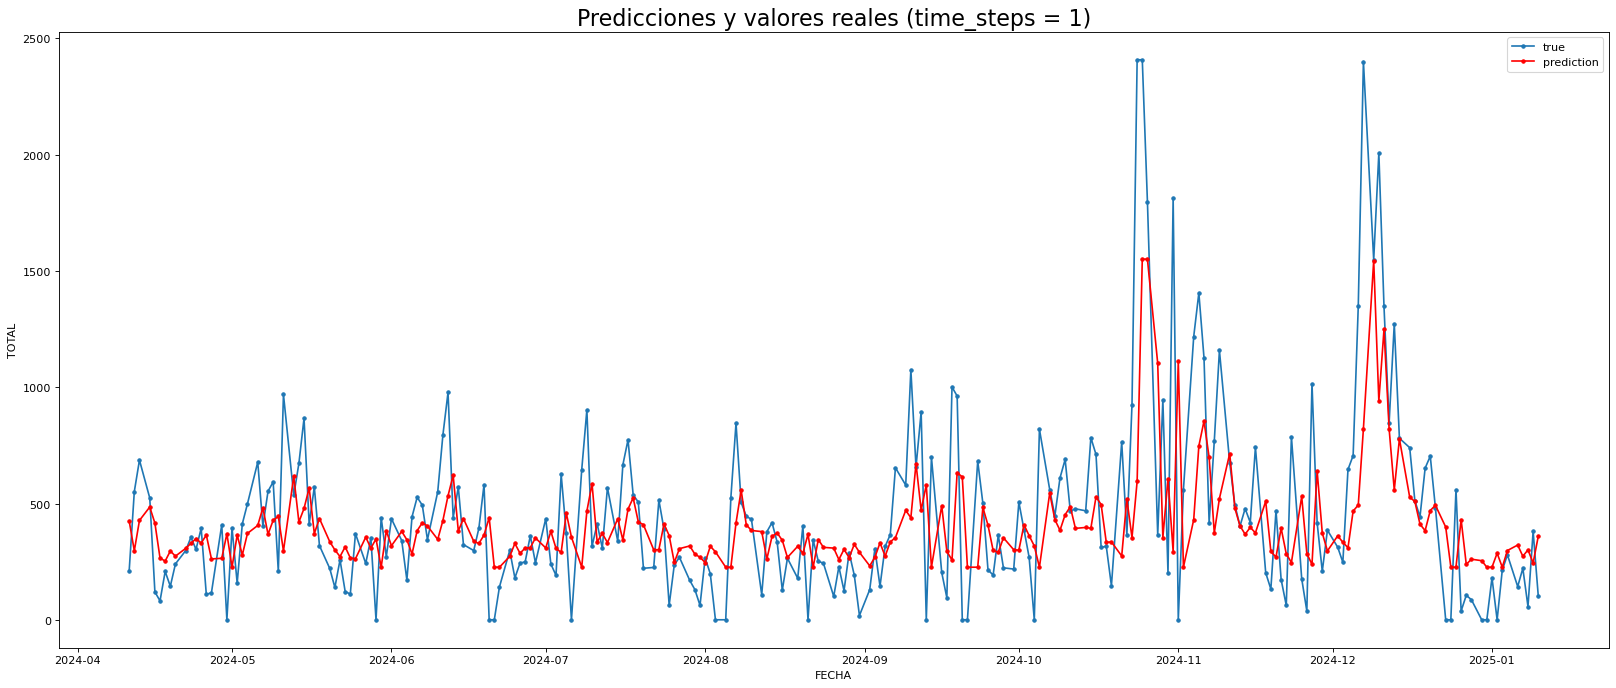

In [388]:
plt.figure(num=None, figsize=(25, 10), dpi=80, facecolor='w', edgecolor='k')
plt.plot(test_set_scaled.index[:len(test_set_scaled)-1], y_test_1.flatten(), marker='.', label="true")
plt.plot(test_set_scaled.index[:len(test_set_scaled)-1], y_pred_1.flatten(), 'r', marker='.', label="prediction")
#plt.plot(np.arange(0, len(y_train_1)), y_train_1.flatten(), 'g', marker='.', label="history")
plt.ylabel('TOTAL')
plt.xlabel('FECHA')
plt.title('Predicciones y valores reales (time_steps = 1)', size=20)
plt.legend()
plt.show()

In [389]:
mse = mean_squared_error(y_test_1, y_pred_1)
rmse = np.sqrt(mse)
print(f'RMSE: ',rmse)

mape = mean_absolute_percentage_error(y_test_1, y_pred_1)
print(f'MAPE: ', mape)

mae = mean_absolute_error(y_test_1, y_pred_1)
print(f'MAE: ',mae)

RMSE:  341.80303411095537
MAPE:  29.756655207585496
MAE:  230.7774482467393


In [390]:
time_steps = 6

X_train_6, y_train_6 = create_dataset(train_set_scaled, train_set_scaled.TOTAL , time_steps)
X_test_6,  y_test_6  = create_dataset(test_set_scaled,  test_set_scaled.TOTAL, time_steps)

In [391]:
model_2 = lstm_architecture(X_data=X_train_6,rate_dropout=0.2)
model_2.compile(optimizer = 'adam', loss = 'mean_squared_error')

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_16 (LSTM)                  │ (None, 6, 250)         │       252,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 6, 250)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_17 (LSTM)                  │ (None, 6, 250)         │       501,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 6, 250)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_18 (LSTM)                  │ (None, 6, 250)         │       501,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 6, 250)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_19 (LSTM)                  │ (None, 250)            │       501,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 250)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │           251 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,755,251 (6.70 MB)

 Trainable params: 1,755,251 (6.70 MB)

 Non-trainable params: 0 (0.00 B)

In [392]:
history_2 = model_2.fit(X_train_6,
                    y_train_6,
                    epochs=100,
                    batch_size=32,
                    shuffle=False)

print("...")
print('Terminando a las: ', datetime.datetime.now())

Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - loss: 0.0294
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0219
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0222
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0211
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0213
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0209
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0205
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0204
Epoch 9/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0196
Epoch 10/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0191
Epoch 11/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0186
Epoch 12/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0180
Epoch 13/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0180
Epoch 14/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0184
Epoch 15/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - lo

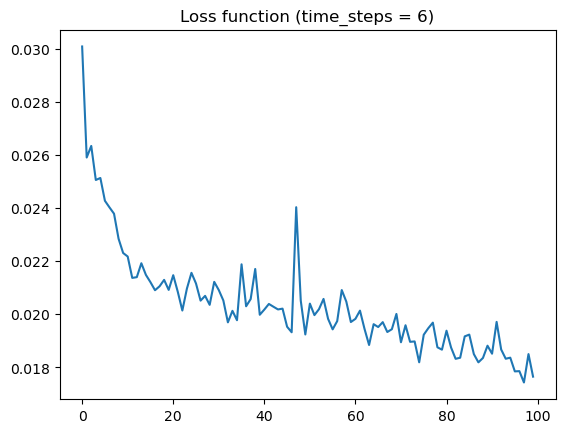

In [393]:
plt.plot(history_2.history['loss'], label='train')
plt.title('Loss function (time_steps = 6)')
plt.show()

In [394]:
y_pred_6 = model_2.predict(X_test_6)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step


In [395]:
y_test_6 = y_test_6 * (train_max.iloc[0] - train_min.iloc[0]) + train_min.iloc[0]    
y_pred_6 = y_pred_6 * (train_max.iloc[0] - train_min.iloc[0]) + train_min.iloc[0]    
y_train_6 = y_train_6 * (train_max.iloc[0] - train_min.iloc[0]) + train_min.iloc[0]  

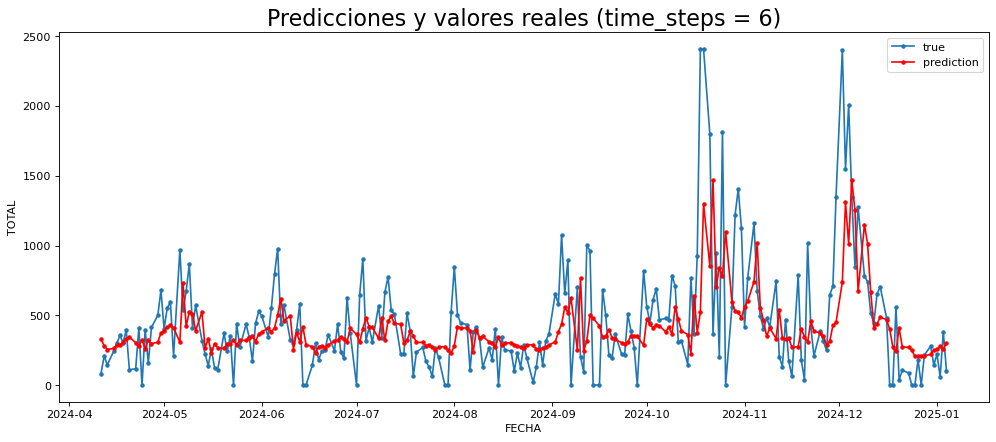

In [396]:
plt.figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(test_set_scaled.index[:len(test_set_scaled)-6], y_test_6.flatten(), marker='.', label="true")
plt.plot(test_set_scaled.index[:len(test_set_scaled)-6], y_pred_6.flatten(), 'r', marker='.', label="prediction")
#plt.plot(np.arange(0, len(y_train_6)), y_train_6.flatten(), 'g', marker='.', label="history")
plt.ylabel('TOTAL')
plt.xlabel('FECHA')
plt.title('Predicciones y valores reales (time_steps = 6)', size=20)
plt.legend()
plt.show()

In [397]:
mse = mean_squared_error(y_test_6, y_pred_6)
rmse = np.sqrt(mse)
print(f'RMSE: ',rmse)

mape = mean_absolute_percentage_error(y_test_6, y_pred_6)
print(f'MAPE: ', mape)

mae = mean_absolute_error(y_test_6, y_pred_6)
print(f'MAE: ',mae)

RMSE:  352.9140400441517
MAPE:  30.47159939407484
MAE:  237.58552734364432


In [398]:
time_steps = 26

X_train_26, y_train_26 = create_dataset(train_set_scaled, train_set_scaled.TOTAL , time_steps)
X_test_26,  y_test_26  = create_dataset(test_set_scaled,  test_set_scaled.TOTAL, time_steps)

In [399]:
model_3 = lstm_architecture(X_data = X_train_26, rate_dropout=0.2)
model_3.compile(optimizer = 'adam', loss = 'mean_squared_error')

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_20 (LSTM)                  │ (None, 26, 250)        │       252,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 26, 250)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_21 (LSTM)                  │ (None, 26, 250)        │       501,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 26, 250)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_22 (LSTM)                  │ (None, 26, 250)        │       501,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 26, 250)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_23 (LSTM)                  │ (None, 250)            │       501,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 250)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           251 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,755,251 (6.70 MB)

 Trainable params: 1,755,251 (6.70 MB)

 Non-trainable params: 0 (0.00 B)

In [400]:
history_3 = model_3.fit(X_train_26,
                    y_train_26,
                    epochs=100,
                    batch_size=32,
                    shuffle=False)

print("...")
print('Terminando a las: ', datetime.datetime.now())

Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 66ms/step - loss: 0.0339
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 0.0233
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 0.0221
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 0.0227
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 0.0206
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 0.0219
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 0.0201
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - loss: 0.0200
Epoch 9/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 0.0207
Epoch 10/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 0.0192
Epoch 11/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 0.0189
Epoch 12/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 0.0191
Epoch 13/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - loss: 0.0184
Epoch 14/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 0.0187
Epoch 15/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - lo

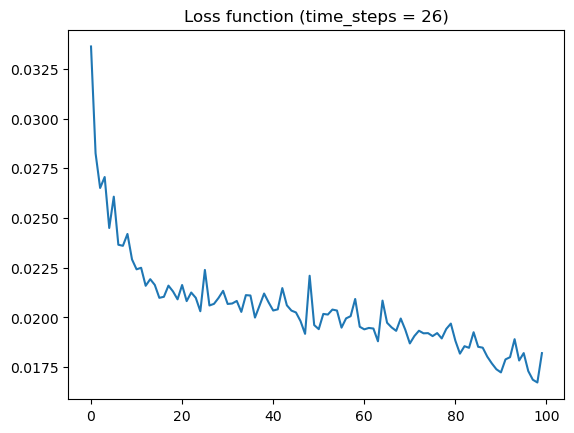

In [401]:
plt.plot(history_3.history['loss'], label='train')
plt.title('Loss function (time_steps = 26)')
plt.show()

In [402]:
y_pred_26 = model_3.predict(X_test_26)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step


In [403]:
y_test_26 = y_test_26 * (train_max.iloc[0] - train_min.iloc[0]) + train_min.iloc[0]    
y_pred_26 = y_pred_26 * (train_max.iloc[0] - train_min.iloc[0]) + train_min.iloc[0]    
y_train_26 = y_train_26 * (train_max.iloc[0] - train_min.iloc[0]) + train_min.iloc[0]  

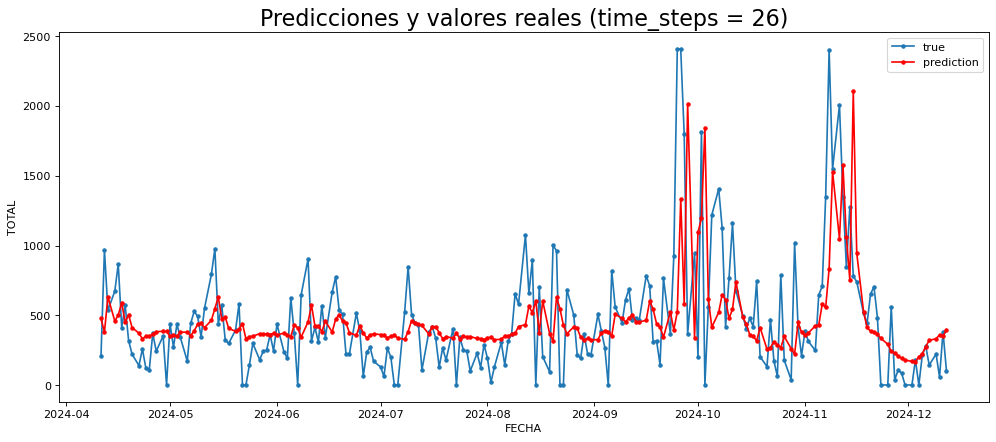

In [404]:
plt.figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(test_set_scaled.index[:len(test_set_scaled)-26], y_test_26.flatten(), marker='.', label="true")
plt.plot(test_set_scaled.index[:len(test_set_scaled)-26], y_pred_26.flatten(), 'r', marker='.', label="prediction")
#plt.plot(np.arange(0, len(y_train_26)), y_train_26.flatten(), 'g', marker='.', label="history")
plt.ylabel('TOTAL')
plt.xlabel('FECHA')
plt.title('Predicciones y valores reales (time_steps = 26)', size=20)
plt.legend()
plt.show()

In [405]:
mse = mean_squared_error(y_test_26, y_pred_26)
rmse = np.sqrt(mse)
print(f'RMSE: ',rmse)

mape = mean_absolute_percentage_error(y_test_26, y_pred_26)
print(f'MAPE: ', mape)

mae = mean_absolute_error(y_test_26, y_pred_26)
print(f'MAE: ',mae)

RMSE:  394.76854352159097
MAPE:  36.7607548509614
MAE:  256.0181842242345


# Prophet

In [407]:
from prophet import Prophet

In [408]:
df_prophet = train_df.copy()

In [409]:
df_prophet = df_prophet.reset_index()
df_prophet = df_prophet.rename(columns={'FECHA':'ds', 'TOTAL':'y'})
df_prophet.head()

,ds,y
0,2021-04-01,89.18
1,2021-04-02,1.00
2,2021-04-03,168.92
3,2021-04-05,452.21
4,2021-04-06,208.30


In [410]:
test_prophet = test_df.copy()

In [411]:
test_prophet = test_prophet.reset_index()
test_prophet = test_prophet.rename(columns={'FECHA':'ds', 'TOTAL':'y'})
test_prophet.head()

,ds,y
0,2024-04-11,547.20
1,2024-04-12,211.70
2,2024-04-13,552.25
3,2024-04-15,687.22
4,2024-04-16,524.55


In [412]:
fin_de_año = pd.DataFrame({
    'holiday': 'fin de año',
    'ds': pd.to_datetime(['2021-12-05', '2022-12-05', '2023-12-05', '2024-12-05']),
    'lower_window': -5,
    'upper_window': 5
})

In [413]:
prophet = Prophet(holidays=fin_de_año, changepoint_range=0.95, yearly_seasonality=50)
prophet.add_seasonality(name='monthly', period=30.5, fourier_order=15)
prophet.fit(df_prophet)

13:37:45 - cmdstanpy - INFO - Chain [1] start processing
13:37:45 - cmdstanpy - INFO - Chain [1] done processing


In [414]:
prophet_pred = prophet.predict(test_prophet)
prophet_pred

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,fin de año,fin de año_lower,fin de año_upper,holidays,holidays_lower,holidays_upper,monthly,monthly_lower,monthly_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2024-04-11,372.011643,-6.128351,699.154867,372.011643,372.011643,-19.004561,-19.004561,-19.004561,0.0,0.0,0.0,0.0,0.0,0.0,-5.950520,-5.950520,-5.950520,51.913294,51.913294,51.913294,-64.967334,-64.967334,-64.967334,0.0,0.0,0.0,353.007083
1,2024-04-12,371.976558,-15.780057,745.738200,371.976558,371.976558,0.549810,0.549810,0.549810,0.0,0.0,0.0,0.0,0.0,0.0,75.617343,75.617343,75.617343,37.772696,37.772696,37.772696,-112.840229,-112.840229,-112.840229,0.0,0.0,0.0,372.526368
2,2024-04-13,371.941472,-106.604857,642.212207,371.941472,371.941472,-101.942857,-101.942857,-101.942857,0.0,0.0,0.0,0.0,0.0,0.0,80.081671,80.081671,80.081671,-82.904556,-82.904556,-82.904556,-99.119971,-99.119971,-99.119971,0.0,0.0,0.0,269.998616
3,2024-04-15,371.871301,179.656438,930.135899,371.871301,371.871301,188.162536,188.162536,188.162536,0.0,0.0,0.0,0.0,0.0,0.0,-18.353113,-18.353113,-18.353113,53.980764,53.980764,53.980764,152.534884,152.534884,152.534884,0.0,0.0,0.0,560.033837
4,2024-04-16,371.836216,167.946858,932.797595,371.836216,371.836216,201.196469,201.196469,201.196469,0.0,0.0,0.0,0.0,0.0,0.0,-173.503843,-173.503843,-173.503843,62.133556,62.133556,62.133556,312.566756,312.566756,312.566756,0.0,0.0,0.0,573.032685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,2025-01-07,362.503464,-160.713345,539.916855,362.484211,362.523170,-171.274694,-171.274694,-171.274694,0.0,0.0,0.0,0.0,0.0,0.0,48.791086,48.791086,48.791086,62.133556,62.133556,62.133556,-282.199335,-282.199335,-282.199335,0.0,0.0,0.0,191.228770
233,2025-01-08,362.468378,-183.530164,565.014079,362.449061,362.488270,-165.472754,-165.472754,-165.472754,0.0,0.0,0.0,0.0,0.0,0.0,44.721290,44.721290,44.721290,38.099551,38.099551,38.099551,-248.293595,-248.293595,-248.293595,0.0,0.0,0.0,196.995625
234,2025-01-09,362.433293,1.179728,681.024630,362.413870,362.453364,-3.072388,-3.072388,-3.072388,0.0,0.0,0.0,0.0,0.0,0.0,169.423151,169.423151,169.423151,51.913294,51.913294,51.913294,-224.408833,-224.408833,-224.408833,0.0,0.0,0.0,359.360905
235,2025-01-10,362.398207,-101.651653,641.434778,362.378580,362.418458,-111.008305,-111.008305,-111.008305,0.0,0.0,0.0,0.0,0.0,0.0,51.632625,51.632625,51.632625,37.772696,37.772696,37.772696,-200.413626,-200.413626,-200.413626,0.0,0.0,0.0,251.389903


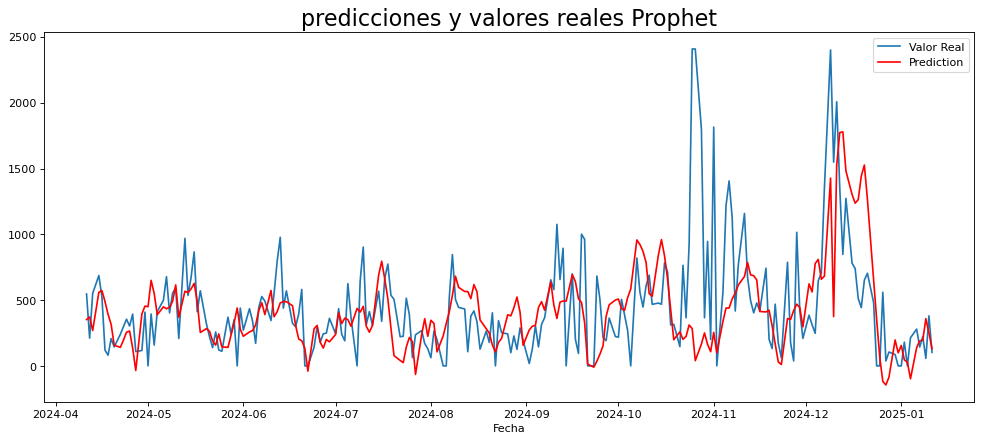

In [415]:
plt.figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(prophet_pred['ds'], test_prophet['y'], label="Valor Real")
plt.plot(prophet_pred['ds'], prophet_pred['yhat'], 'r', label="Prediction")
plt.xlabel('Fecha')
plt.title('predicciones y valores reales Prophet', size=20)
plt.legend()
plt.show()

In [416]:
mse = mean_squared_error(test_prophet['y'], prophet_pred['yhat'])
rmse = np.sqrt(mse)
print(f'RMSE: ',rmse)

mape = mean_absolute_percentage_error(test_prophet['y'], prophet_pred['yhat'])
print(f'MAPE: ', mape)

mae = mean_absolute_error(test_prophet['y'], prophet_pred['yhat'])
print(f'MAE: ',mae)

RMSE:  401.2017426561933
MAPE:  17.823523036790153
MAE:  258.1217589578613


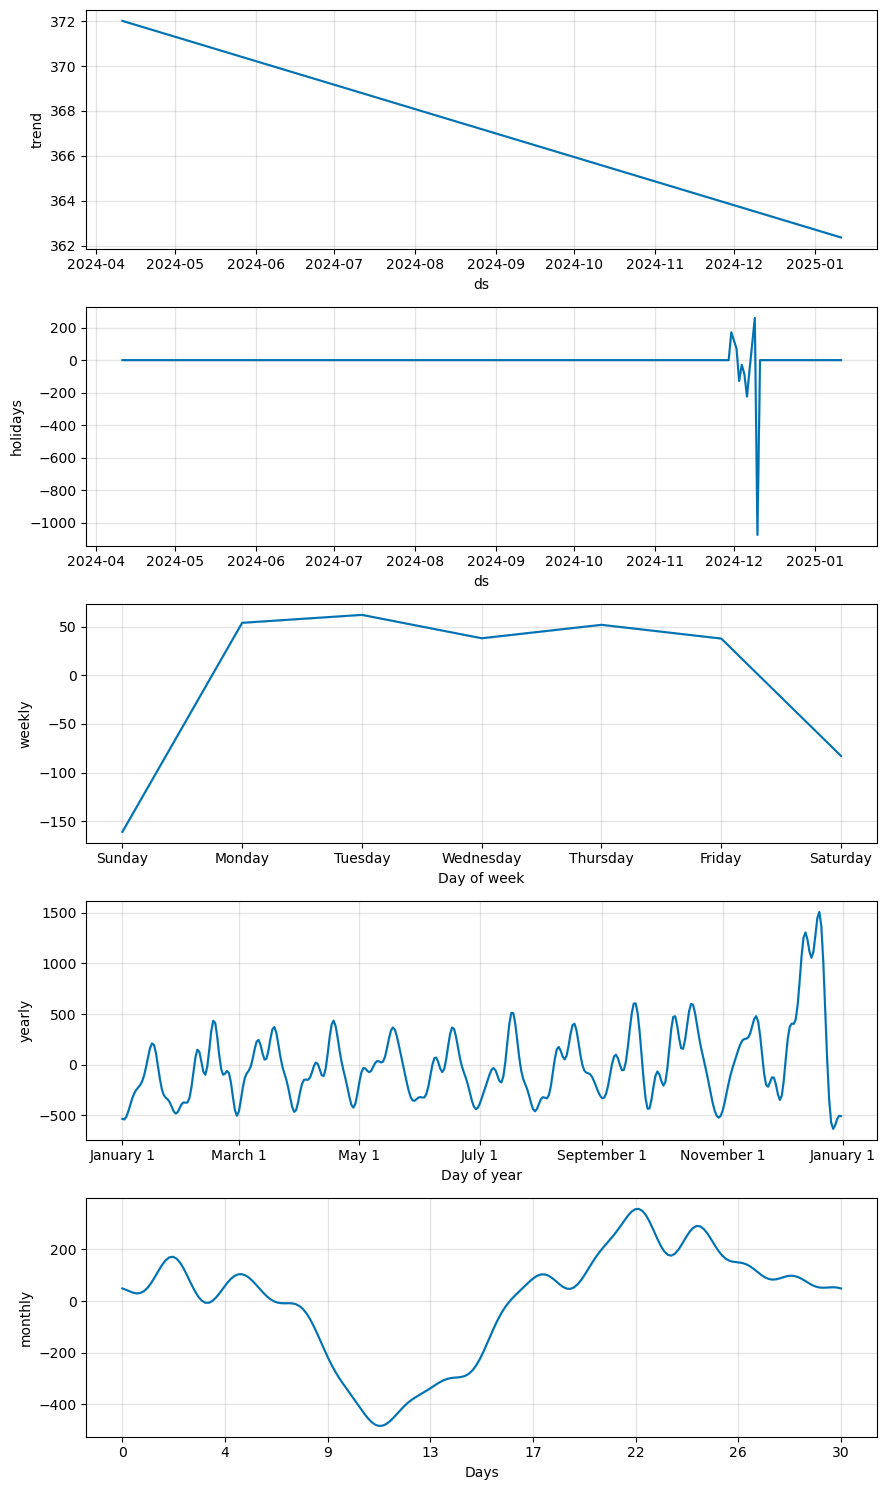

In [417]:
prophet.plot_components(prophet_pred);